In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../01.Data_Collection/films_updated.csv')

In [3]:
df.shape

(686, 38)

In [4]:
df.isnull().sum()

영화명           0
영화코드          0
개봉일           0
대표국적          0
국적            0
장르            0
등급            0
영화형태          0
영화구분          0
제작사          17
배급사           0
상영횟수          0
전국스크린수        0
전국매출액         0
전국관객수         0
서울매출액         0
서울관객수         0
F-rated       0
감독            0
대표감독          0
감독코드          0
감독성별          0
감독_대표역할       0
감독필모          0
작가            0
대표작가          0
대표작가(필명)      0
작가코드          0
작가성별          0
작가_대표역할       0
작가필모          0
배우            0
주연배우          0
배역명         166
배우코드          0
배우성별          0
배우_대표역할       0
배우필모          0
dtype: int64

In [5]:
df['F-rated'].value_counts()

0    349
1    225
2     62
3     50
Name: F-rated, dtype: int64

11/23 14:36 film_updated.csv
* 작가성별 결측치 처리 완료
* F-rated 재계산 완료
* Shape: (686, 38)

#  F등급별 매출액 비교

## 1. 전국매출액 단순 비교
* F등급 0인 영화의 분포는 분산이 매우 크다. 
    * 특히 2019년 개봉작 '극한직업'의 상영횟수와 매출액은 눈에 띄는 아웃라이어: 이전 해에도 이런 천만영화는 있긴 했을텐데 얘가 유난히 큰 걸 보면 몰아주기 현상이 최근으로 올 수록 점점 더 심해지는 것 아닐까?
    * 극한직업은 현재 매출액 2위
    * 극한직업의 전국관객수 = 95UBD (1위 명량 = 100UBD)
* 최대값 비교: 0-F가 3-F의 15.72배
* 평균값 비교: 0-F가 3-F의 13.45배
* 중간값 비교: 0-F가 3-F의 7.03배

In [6]:
sales_des = df.groupby('F-rated')['전국매출액'].describe()
sales_des

,count,mean,std,min,25%,50%,75%,max
F-rated,,,,,,,,
0,349.000000,8443828671.498568,19296622914.554569,2237000.000000,19563000.000000,284650500.000000,6440492657.000000,139647979516.000000
1,225.000000,4416241416.057777,12245289357.006899,3389900.000000,37782300.000000,233916700.000000,2671391900.000000,98463132781.000000
2,62.000000,3659068263.209677,6641032538.450189,4166700.000000,25002862.500000,192326780.000000,3541716761.000000,28869614062.000000
3,50.000000,627730950.460000,1738309404.087977,6701500.000000,17332850.000000,40494700.000000,317282407.500000,8881616256.000000


In [7]:
# Cohen's d : 이걸로 비교 못할 것 같다
(sales_des.iloc[0,1] - sales_des.iloc[3,1]) / df['전국매출액'].std()

0.49552236105636377

In [21]:
# 최대값 비교: 0-F가 3-F의 15.72배
sales_des.iloc[0,-1] / sales_des.iloc[3,-1]

15.7232620157013

In [18]:
# 평균값 비교: 0-F가 3-F의 13.45배
sales_des.iloc[0,1] / sales_des.iloc[3,1]

13.451349921986395

In [20]:
# 중간값 비교: 0-F가 3-F의 7.03배
sales_des.iloc[0,-3] / sales_des.iloc[3,-3]

7.029327294683008

<Figure size 1440x1080 with 0 Axes>

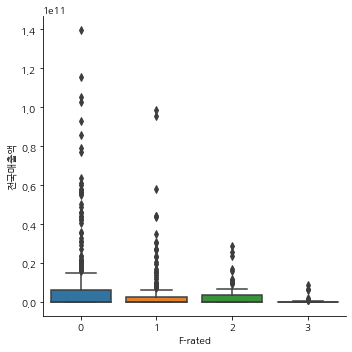

In [22]:
plt.figure(figsize=[20,15])
sns.catplot(x='F-rated', y='전국매출액', data=df, kind='box')

In [23]:
# 엄청난 아웃라이어가 있어서 확인해봤더니 극한직업
df[df['전국매출액']==139647979516]

,영화명,영화코드,개봉일,대표국적,국적,장르,등급,영화형태,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모
592,극한직업,20182530,2019-01-23,한국,한국,코미디,15세이상관람가,장편,일반영화,"(주)어바웃필름,영화사 해그림 주식회사,씨제이이앤엠(주)",씨제이이앤엠(주),292578,1978,139647979516.000000,16264944,31858660536,3638287,0,이병헌,이병헌,20125862,남자,감독,드림(가제)|극한직업|레슬러|바람 바람 바람|스물|오늘의 연애|타짜-신의 손|힘내세...,문충일,문충일,문충일,20303529,남자,시나리오(각본),극한직업,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,허준석,한준우,김명준,나철,정재광",류승룡,고반장,10019065,남자,배우,입술은 안돼요(가제)|인생은 아름다워(가제)|극한직업|7년의 밤|염력|제5열|서울역...


In [24]:
# 극한직업 UBD
16264944 / 170000

95.6761411764706

## 2. 상영횟수 비교
* 최대값 비교: 0-F가 3-F의 6.97배
* 평균값 비교: 0-F가 3-F의 6.4배
* 중간값 비교: 0-F가 3-F의 5.22배

In [25]:
show_des = df.groupby('F-rated')['상영횟수'].describe()
show_des

,count,mean,std,min,25%,50%,75%,max
F-rated,,,,,,,,
0,349.000000,25572.765043,44192.492902,41.000000,393.000000,3189.000000,32618.000000,292578.000000
1,225.000000,15901.488889,30435.793473,45.000000,572.000000,2560.000000,17414.000000,184198.000000
2,62.000000,17167.532258,27534.009084,96.000000,516.500000,1885.000000,19525.750000,120808.000000
3,50.000000,3997.580000,8921.958084,140.000000,409.500000,610.500000,3188.000000,41970.000000


In [27]:
# 최대값 비교: 0-F가 3-F의 6.97배
show_des.iloc[0,-1] / show_des.iloc[3,-1]

6.971122230164403

In [28]:
# 평균값 비교: 0-F가 3-F의 6.4배
show_des.iloc[0,1] / show_des.iloc[3,1]

6.397061482942166

In [29]:
# 중간값 비교: 0-F가 3-F의 5.22배
show_des.iloc[0,-3] / show_des.iloc[3,-3]

5.223587223587224

<Figure size 1440x1080 with 0 Axes>

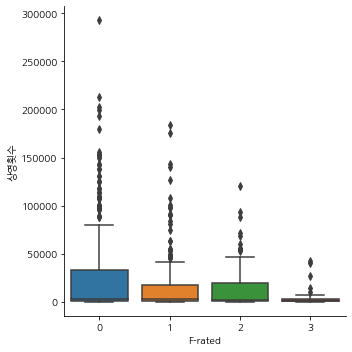

In [30]:
plt.figure(figsize=[20,15])
sns.catplot(x='F-rated', y='상영횟수', data=df, kind='box')

## 3. 스크린수 (개봉 첫 주 최대 스크린수) 비교
* 최대값 비교: 0-F가 3-F의 2.83배
* 평균값 비교: 0-F가 3-F의 3.41배
* 중간값 비교: 0-F가 3-F의 6.76배

In [39]:
screen_des = df.groupby('F-rated')['전국스크린수'].describe()
screen_des

,count,mean,std,min,25%,50%,75%,max
F-rated,,,,,,,,
0,349.000000,425.765043,481.700767,1.000000,25.000000,223.000000,763.000000,2235.000000
1,225.000000,332.248889,366.404880,1.000000,41.000000,190.000000,536.000000,1906.000000
2,62.000000,348.725806,385.979281,3.000000,24.000000,118.500000,588.000000,1431.000000
3,50.000000,124.940000,190.798046,9.000000,18.000000,33.000000,135.250000,790.000000


In [40]:
# 최대값 비교: 0-F가 3-F의 2.83배
screen_des.iloc[0,-1] / screen_des.iloc[3,-1]

2.829113924050633

In [41]:
# 평균값 비교: 0-F가 3-F의 3.41배
screen_des.iloc[0,1] / screen_des.iloc[3,1]

3.407756066751582

In [42]:
# 중간값 비교: 0-F가 3-F의 6.76배
screen_des.iloc[0,-3] / screen_des.iloc[3,-3]

6.757575757575758

<Figure size 1440x1080 with 0 Axes>

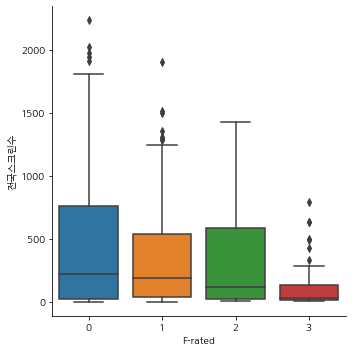

In [43]:
plt.figure(figsize=[20,15])
sns.catplot(x='F-rated', y='전국스크린수', data=df, kind='box')

## 4. 상영횟수 대비 매출액 (회당 평균 매출액) 비교 
* 최대값 비교: 0-F가 3-F의 2.92배
* 평균값 비교: 0-F가 3-F의 1.93배
* 중간값 비교: 0-F가 3-F의 1.68배
* 매출액을 단순비교했을 때는 최대값이 15.72배, 평균값이 13.45배, 중간값이 7.03배였는데 차이가 아주 많이 작아짐 -> 여성영화가 상영기회가 적은 것에 비해 좋은 결과를 내고 있음

In [31]:
df['회당 평균 매출액'] = df['전국매출액'] / df['상영횟수']

In [32]:
sales_avg_des = df.groupby('F-rated')['회당 평균 매출액'].describe()
sales_avg_des

,count,mean,std,min,25%,50%,75%,max
F-rated,,,,,,,,
0,349.000000,155540.729377,130550.907331,16898.285714,53692.105263,111269.702842,226292.536063,707758.081588
1,225.000000,134106.185869,107799.196562,12607.660455,53483.918813,95928.555121,179533.700787,566693.232923
2,62.000000,127020.998213,86527.101199,20012.500000,50720.432237,118052.061786,176729.343906,404414.606255
3,50.000000,80636.964443,53594.890722,16052.380952,41535.657832,66291.389137,100268.054881,242314.261272


In [35]:
# 최대값 비교: 0-F가 3-F의 2.92배
sales_avg_des.iloc[0,-1] / sales_avg_des.iloc[3,-1]

2.9208271847999474

In [36]:
# 평균값 비교: 0-F가 3-F의 1.93배
sales_avg_des.iloc[0,1] / sales_avg_des.iloc[3,1]

1.9289010995234876

In [37]:
# 중간값 비교: 0-F가 3-F의 1.68배
sales_avg_des.iloc[0,-3] / sales_avg_des.iloc[3,-3]

1.6784940592051072

<Figure size 1440x1080 with 0 Axes>

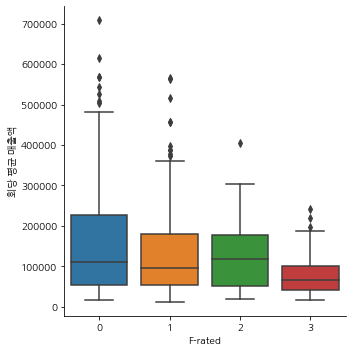

In [38]:
plt.figure(figsize=[20,15])
sns.catplot(x='F-rated', y='회당 평균 매출액', data=df, kind='box')

스크린마다 수용가능 관객수가 다르고 특정 영화만 대형관에 상영되는 것, 프라임 시간대에 배정되는 것이 중요한 feature 될 수 있음  
-> 각 영화가 어떤 스크린에서 상영했는지에 대한 데이터, 스크린별 수용인원 데이터, 상영시간표 데이터 추가로 필요

## 5. 스크린수 대비 매출액 (스크린당 평균 매출액) 비교 
* 최대값 비교: 0-F가 3-F의 8.78배
* 평균값 비교: 0-F가 3-F의 3.67배
* 중간값 비교: 0-F가 3-F의 1.31배
* 매출액을 단순비교했을 때는 최대값이 15.72배, 평균값이 13.45배, 중간값이 7.03배였는데 차이가 아주 많이 작아짐 -> 여성영화가 상영기회가 적은 것(적은 스크린을 배당받고 있는 것)에 비해 좋은 결과를 내고 있음

In [44]:
df['스크린당 평균 매출액'] = df['전국매출액'] / df['전국스크린수']

In [45]:
sales_avg_des2 = df.groupby('F-rated')['스크린당 평균 매출액'].describe()
sales_avg_des2

,count,mean,std,min,25%,50%,75%,max
F-rated,,,,,,,,
0,349.000000,8173501.787248,13607153.328351,165650.000000,738703.921569,1822680.000000,9425564.078363,98707706.766917
1,225.000000,5544535.147880,9272414.636843,171095.121951,724685.321101,1822815.804598,5779303.054187,64821022.238973
2,62.000000,5021844.480149,6139341.381359,409959.803922,876995.790960,1506687.215370,7208715.099360,24927032.609568
3,50.000000,2225764.882455,2487232.162176,364889.583333,770374.621212,1386302.777778,2175343.452381,11242552.222785


In [46]:
# 최대값 비교: 0-F가 3-F의 8.78배
sales_avg_des2.iloc[0,-1] / sales_avg_des2.iloc[3,-1]

8.779830843646918

In [47]:
# 평균값 비교: 0-F가 3-F의 3.67배
sales_avg_des2.iloc[0,1] / sales_avg_des2.iloc[3,1]

3.672221559284236

In [48]:
# 중간값 비교: 0-F가 3-F의 1.31배
sales_avg_des2.iloc[0,-3] / sales_avg_des2.iloc[3,-3]

1.3147777161073917

<Figure size 1440x1080 with 0 Axes>

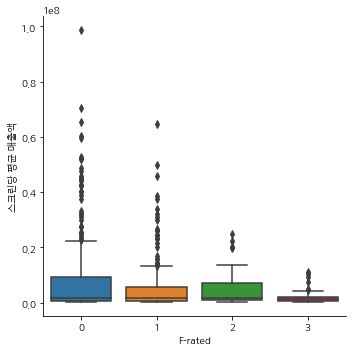

In [49]:
plt.figure(figsize=[20,15])
sns.catplot(x='F-rated', y='스크린당 평균 매출액', data=df, kind='box')

# 배급사별 F등급 영화 비율

배급사명 전처리 완료된 파일임  
: 롯데엔터테인먼트는 2018년 5월 31일까지는 롯데쇼핑 소속, 2018년 6월 1일 이후 롯데컬처웍스 소속으로 배급사 이름이 나눠져 있었으나 모두 '롯데컬처웍스(주)롯데엔터테인먼트'로 통일했음

## 1. 배급사별 총 상영횟수 현황
4대 배급사 'CJ E&M', '쇼박스', 'NEW', '롯데엔터테인먼트'는 투자까지도 하고 있는 '투자/배급사'로 한국영화산업에 매우 큰 영향력을 발휘한다.  
이들이 배급한 영화의 상영이 전체 영화 상영의 78%를 차지하고 있다.  

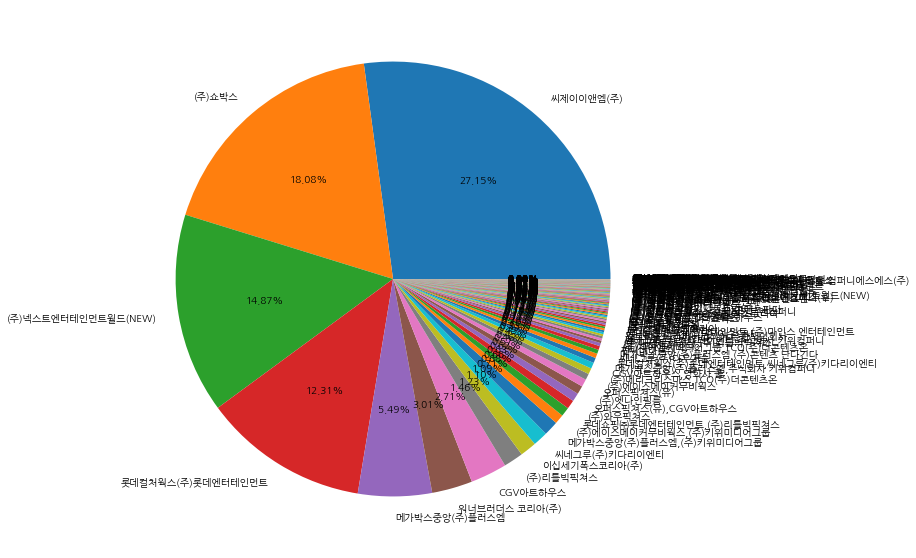

In [55]:
plt.rcParams["figure.figsize"] = (20,10)
df.groupby('배급사')['상영횟수'].sum().sort_values(ascending=False).plot(kind='pie', label='', autopct='%.2f%%')

In [57]:
27.15 + 18.08 + 14.87 + 12.31

72.41

In [78]:
72.41 + 5.49 + 3.01 + 2.71 + 1.46 + 1.23 + 1.1

87.40999999999998

## 2. 총 상영횟수 기준 Top 10 배급사의 F등급 영화 배급 비율
대형배급사가 차지하는 파이가 이렇게 크므로 이들로부터 배급되는 것이 영화 흥행의 주요요인이 된다.  
이런 대형배급사들이 여성주도영화를 얼마나 배급하고 있는지 알아보자.

In [58]:
# 배급사별로 F등급별 영화 개수 구하기

f_counting = pd.DataFrame({'F-rated': [0, 1, 2, 3]})

for cp in df['배급사'].unique():
    dist = df[df['배급사'] == cp]
    by_dist = dist.groupby('F-rated')['영화명'].count().reset_index().rename(columns = {'영화명':cp})
    f_counting = f_counting.merge(by_dist, how='left', on='F-rated')

f_counting = f_counting.T.drop('F-rated', axis=0) 

In [59]:
f_counting.head()

,0,1,2,3
메가박스중앙(주)플러스엠,9.000000,9.000000,4.000000,1.000000
"(주)마인스 엔터테인먼트,주식회사 마운틴픽쳐스",1.000000,nan,nan,nan
씨제이이앤엠(주),30.000000,18.000000,3.000000,2.000000
(주)넥스트엔터테인먼트월드(NEW),31.000000,13.000000,4.000000,1.000000
(주)인디플러그,6.000000,7.000000,2.000000,3.000000


In [60]:
len(f_counting)

190

In [61]:
# 배급사별 전체 영화개수 구하기

f_counting = f_counting.fillna(0)
f_counting['영화개수'] = f_counting.sum(axis=1)

In [62]:
f_counting.head()

,0,1,2,3,영화개수
메가박스중앙(주)플러스엠,9.000000,9.000000,4.000000,1.000000,23.000000
"(주)마인스 엔터테인먼트,주식회사 마운틴픽쳐스",1.000000,0.000000,0.000000,0.000000,1.000000
씨제이이앤엠(주),30.000000,18.000000,3.000000,2.000000,53.000000
(주)넥스트엔터테인먼트월드(NEW),31.000000,13.000000,4.000000,1.000000,49.000000
(주)인디플러그,6.000000,7.000000,2.000000,3.000000,18.000000


In [63]:
# 배급사별 총 상영횟수 구하기

show_numbers = df.groupby('배급사')['상영횟수'].sum().reset_index().set_index('배급사')
del show_numbers.index.name
f_counting = f_counting.merge(show_numbers, how='inner', left_index=True, right_index=True).sort_values('상영횟수')
len(f_counting)

190

In [68]:
f_counting.tail(20)

,0,1,2,3,영화개수,상영횟수
"CGV아트하우스,영화사 풀",1.000000,0.000000,0.000000,0.000000,1.000000,61332
"(주)메리크리스마스,TCO(주)더콘텐츠온",1.000000,0.000000,0.000000,0.000000,1.000000,61749
(주)에이스메이커무비웍스,0.000000,1.000000,0.000000,0.000000,1.000000,63205
오퍼스픽쳐스(유),5.000000,3.000000,0.000000,0.000000,8.000000,77984
(주)엣나인필름,7.000000,3.000000,2.000000,1.000000,13.000000,85810
"오퍼스픽쳐스(유),CGV아트하우스",1.000000,1.000000,0.000000,0.000000,2.000000,86150
(주)와우픽쳐스,0.000000,1.000000,0.000000,0.000000,1.000000,90288
"롯데쇼핑㈜롯데엔터테인먼트,(주)리틀빅픽쳐스",0.000000,0.000000,1.000000,0.000000,1.000000,93066
"(주)에이스메이커무비웍스,(주)키위미디어그룹",1.000000,0.000000,0.000000,0.000000,1.000000,97351
"메가박스중앙(주)플러스엠,(주)키위미디어그룹",1.000000,0.000000,0.000000,0.000000,1.000000,149389


배급한 영화 개수는 많아도 그 영화들이 모두 작은 영화라서 상영횟수 총합은 작은 배급사도 있다.  
산업 내에서 영향력 있는 대형배급사인지를 판단하는 데에는 상영횟수가 더 적합한 지표다.

In [65]:
f_counting.index

Index(['아방가르드 필름', '(주)피터팬픽쳐스', '(주)에픽캔', '(주)영화사히트', '영화사 마그나',
       '(주)씨에이씨엔터테인먼트', '(주)갤럭시컴퍼니', '퓨어웨이픽쳐스', '(주)로이테미디어', '㈜스토리셋',
       ...
       '씨네그루(주)키다리이엔티', '이십세기폭스코리아(주)', '(주)리틀빅픽쳐스', 'CGV아트하우스',
       '워너브러더스 코리아(주)', '메가박스중앙(주)플러스엠', '롯데컬처웍스(주)롯데엔터테인먼트',
       '(주)넥스트엔터테인먼트월드(NEW)', '(주)쇼박스', '씨제이이앤엠(주)'],
      dtype='object', length=190)

In [67]:
# 총 상영횟수 기준 배급사 Top 10

top10 = f_counting[-10:].index
top10

Index(['씨네그루(주)키다리이엔티', '이십세기폭스코리아(주)', '(주)리틀빅픽쳐스', 'CGV아트하우스',
       '워너브러더스 코리아(주)', '메가박스중앙(주)플러스엠', '롯데컬처웍스(주)롯데엔터테인먼트',
       '(주)넥스트엔터테인먼트월드(NEW)', '(주)쇼박스', '씨제이이앤엠(주)'],
      dtype='object')

In [70]:
# Top 10 배급사들이 다른 배급사와 공동배급한 경우 Top 10의 데이터에 각 사례의 '1 / 공동배급사 개수' 값을 더한다.

for top in top10:
    for i, row in f_counting.iterrows():
        if (top in i) & (i != top):
            f_counting.loc[top] = f_counting.loc[top] + (row / len(i.split(',')))

In [72]:
f_counting = f_counting.sort_values('상영횟수')
f_counting.tail(20)

,0,1,2,3,영화개수,상영횟수
"CGV아트하우스,영화사 풀",1.000000,0.000000,0.000000,0.000000,1.000000,61332.000000
"(주)메리크리스마스,TCO(주)더콘텐츠온",1.000000,0.000000,0.000000,0.000000,1.000000,61749.000000
(주)에이스메이커무비웍스,0.000000,1.000000,0.000000,0.000000,1.000000,63205.000000
오퍼스픽쳐스(유),5.000000,3.000000,0.000000,0.000000,8.000000,77984.000000
(주)엣나인필름,7.000000,3.000000,2.000000,1.000000,13.000000,85810.000000
"오퍼스픽쳐스(유),CGV아트하우스",1.000000,1.000000,0.000000,0.000000,2.000000,86150.000000
(주)와우픽쳐스,0.000000,1.000000,0.000000,0.000000,1.000000,90288.000000
"롯데쇼핑㈜롯데엔터테인먼트,(주)리틀빅픽쳐스",0.000000,0.000000,1.000000,0.000000,1.000000,93066.000000
"(주)에이스메이커무비웍스,(주)키위미디어그룹",1.000000,0.000000,0.000000,0.000000,1.000000,97351.000000
"메가박스중앙(주)플러스엠,(주)키위미디어그룹",1.000000,0.000000,0.000000,0.000000,1.000000,149389.000000


In [74]:
# F등급별 비율 구하기

f_counting[['F-0', 'F-1', 'F-2', 'F-3']] = f_counting[[0, 1, 2, 3]].apply(lambda x: x / f_counting['영화개수'] * 100)
f_counting.tail(10)

,0,1,2,3,영화개수,상영횟수,F-0,F-1,F-2,F-3
이십세기폭스코리아(주),3.000000,0.000000,0.000000,0.000000,3.000000,169247.000000,100.000000,0.000000,0.000000,0.000000
씨네그루(주)키다리이엔티,6.000000,6.000000,0.000000,0.000000,12.000000,185727.500000,50.000000,50.000000,0.000000,0.000000
(주)리틀빅픽쳐스,20.500000,10.000000,5.000000,4.500000,40.000000,277262.000000,51.250000,25.000000,12.500000,11.250000
워너브러더스 코리아(주),6.000000,1.000000,1.000000,0.000000,8.000000,414979.000000,75.000000,12.500000,12.500000,0.000000
CGV아트하우스,13.000000,11.500000,2.000000,2.500000,29.000000,456688.500000,44.827586,39.655172,6.896552,8.620690
메가박스중앙(주)플러스엠,10.500000,9.500000,4.000000,1.000000,25.000000,878129.000000,42.000000,38.000000,16.000000,4.000000
롯데컬처웍스(주)롯데엔터테인먼트,18.500000,15.000000,4.000000,1.000000,38.500000,1717062.000000,48.051948,38.961039,10.389610,2.597403
(주)넥스트엔터테인먼트월드(NEW),31.500000,13.000000,4.000000,1.000000,49.500000,2049410.500000,63.636364,26.262626,8.080808,2.020202
(주)쇼박스,19.500000,9.000000,4.000000,0.000000,32.500000,2494927.000000,60.000000,27.692308,12.307692,0.000000
씨제이이앤엠(주),30.000000,18.000000,3.000000,2.000000,53.000000,3737539.000000,56.603774,33.962264,5.660377,3.773585


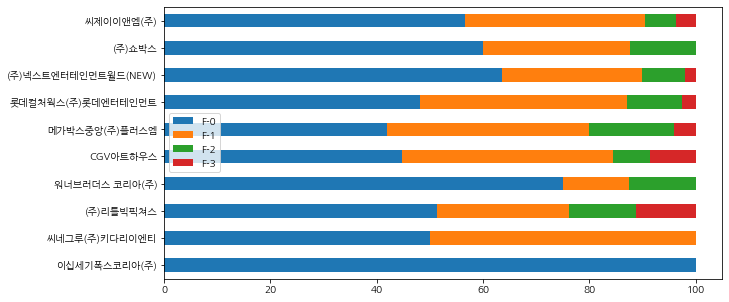

In [77]:
plt.rcParams["figure.figsize"] = (10,5)
f_counting.iloc[-10:, -4:].plot(kind='barh', stacked=True)

가장 많은 상영횟수를 차지하고 있는 10개의 대형배급사가 F-0 영화를 42% 이상 배급하고 있다.  
F-3(트리플 F등급) 영화는 8개의 대형배급사에서 5%도 차지하지 못했으며, F-1, F-2까지 확장해도 대부분 50%를 넘지 못한다.  
이 10개의 배급사가 한국영화 상영 전체 횟수의 87%를 차지하고 있는 와중에 이들이 남성영화의 배급을 훨씬 많이 하고 있으니 여성영화들은 대중에게 선보일 기회를 적게 갖게 되고, 흥행으로 이어지지 못하는 것은 당연한 결과다.

(제작사로도 비교해봤데 가장 많이 만든 곳이 10개의 영화를 만들었고 '한국영상아카데미'. 배급사만큼 몇몇 대형제작사가 아주 많은 영화를 제작하는 현상이 없어서 비교가 어려움.)